# 🌦️ Weather Analysis in Szeged (2006–2016)

## 📌 Project Overview

This project explores weather data from Szeged, Hungary, covering the period between 2006 and 2016. The dataset includes hourly and daily readings with features such as temperature, wind speed, humidity, cloud cover, and visibility.

## 🎯 Business Question

**Can weather patterns be used to predict days with low visibility in Szeged, Hungary, and how can this insight support transportation planning or logistics optimization?**

Understanding and anticipating low visibility conditions is crucial for sectors like aviation, public transportation, logistics, and ride-sharing services. Delays and disruptions can lead to financial losses and safety risks. By leveraging historical weather data, this project aims to uncover the key meteorological factors that influence visibility and evaluate whether predictive modeling could enhance decision-making in transportation systems.

## 📊 Dataset Summary

The dataset includes the following features:

- `time`: Timestamp of the observation  
- `summary`: Short textual summary of weather conditions  
- `precipType`: Type of precipitation (rain, snow, etc.)  
- `temperature`: Measured temperature (°C)  
- `apparentTemperature`: "Feels like" temperature (°C)  
- `humidity`: Relative humidity  
- `windSpeed`: Wind speed (m/s)  
- `windBearing`: Wind direction (degrees)  
- `visibility`: Distance visible (km)  
- `cloudCover`: Fraction of sky covered by clouds  
- `pressure`: Atmospheric pressure (hPa)

🔗 **Dataset Source**: [Szeged Weather Dataset on Kaggle](https://www.kaggle.com/datasets/budincsevity/szeged-weather)

## 🔍 Next Steps

In the following notebook, we will:

1. Perform exploratory data analysis (EDA) to understand key patterns and distributions.
2. Identify correlations between visibility and other weather features.
3. Build a predictive model to detect low visibility conditions based on weather input.
4. Discuss the implications of this model for real-world applications in transport and logistics.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('weatherHistory.csv') 

# Preview the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
# Dataset structure and info
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### 📊 Dataset Overview

The dataset contains **96,453** hourly weather observations recorded in **Szeged, Hungary** from **2006 to 2016**. It includes a mix of numerical and categorical features that describe various atmospheric conditions.

#### **Column Summary:**

- **Numerical Features (8):**
  - `Temperature (C)`
  - `Apparent Temperature (C)`
  - `Humidity`
  - `Wind Speed (km/h)`
  - `Wind Bearing (degrees)`
  - `Visibility (km)` *(Target variable)*
  - `Loud Cover`
  - `Pressure (millibars)`

- **Categorical/Text Features (4):**
  - `Formatted Date`
  - `Summary`
  - `Precip Type`
  - `Daily Summary`

#### **Missing Values:**
- The dataset is largely complete, with only **517 missing values** in the `Precip Type` column (approximately **0.54%** of the dataset).

In [3]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns. \n")

Dataset contains 96453 rows and 12 columns. 



In [5]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 24


#### **Duplicate Records:**
- A total of **24 duplicate rows** were identified and subsequently removed to maintain data quality and prevent bias during analysis.

In [7]:
# Function to fill missing values in 'Precip Type' using mode within each Summary group
def fill_precip_type_by_summary(group):
    mode = group['Precip Type'].mode()
    if not mode.empty:
        group['Precip Type'] = group['Precip Type'].fillna(mode.iloc[0])
    return group

# Apply the function to each group
df = df.groupby('Summary').apply(fill_precip_type_by_summary)

# Confirm if any missing values remain
print("Remaining missing values in 'Precip Type':", df['Precip Type'].isnull().sum())


Remaining missing values in 'Precip Type': 0


C:\Users\praja\AppData\Local\Temp\ipykernel_22884\2426037429.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Summary').apply(fill_precip_type_by_summary)


In [8]:
# Drop duplicate rows
df = df.drop_duplicates()

# Confirm shape after removing duplicates
print(f"\nDataset shape after removing duplicates: {df.shape}")



Dataset shape after removing duplicates: (96429, 12)


In [42]:
# Convert to datetime while handling timezone-aware strings
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Now extract features from datetime
df['year'] = df['Formatted Date'].dt.year
df['month'] = df['Formatted Date'].dt.month
df['day'] = df['Formatted Date'].dt.day
df['hour'] = df['Formatted Date'].dt.hour
df['weekday'] = df['Formatted Date'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

# Preview the new features
df[['Formatted Date', 'year', 'month', 'day', 'hour', 'weekday', 'is_weekend']].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 96429 entries, ('Breezy', 7180) to ('Windy and Partly Cloudy', 84780)
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96429 non-null  datetime64[ns, UTC]
 1   Summary                   96429 non-null  object             
 2   Precip Type               96429 non-null  object             
 3   Temperature (C)           96429 non-null  float64            
 4   Apparent Temperature (C)  96429 non-null  float64            
 5   Humidity                  96429 non-null  float64            
 6   Wind Speed (km/h)         96429 non-null  float64            
 7   Wind Bearing (degrees)    96429 non-null  float64            
 8   Visibility (km)           96429 non-null  float64            
 9   Loud Cover                96429 non-null  float64            
 10  Pressure (millibars)      96429 non-nu

In [10]:
# Display summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96429.0,11.929692,9.550492,-21.822222,4.683333,12.0000,18.838889,39.905556
Apparent Temperature (C),96429.0,10.851707,10.695743,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96429.0,0.734902,0.195466,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96429.0,10.812460,6.913345,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96429.0,187.497506,107.376423,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96429.0,10.347225,4.192548,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96429.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96429.0,1003.232915,116.984300,0.000000,1011.900000,1016.4500,1021.090000,1046.380000
year,96429.0,2011.000539,3.162514,2005.000000,2008.000000,2011.0000,2014.000000,2016.000000
month,96429.0,6.522633,3.448851,1.000000,4.000000,7.0000,10.000000,12.000000


In [11]:
# Automatically detect numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preview the list
print("Numerical columns in the dataset:")
print(numerical_cols)

Numerical columns in the dataset:
['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']


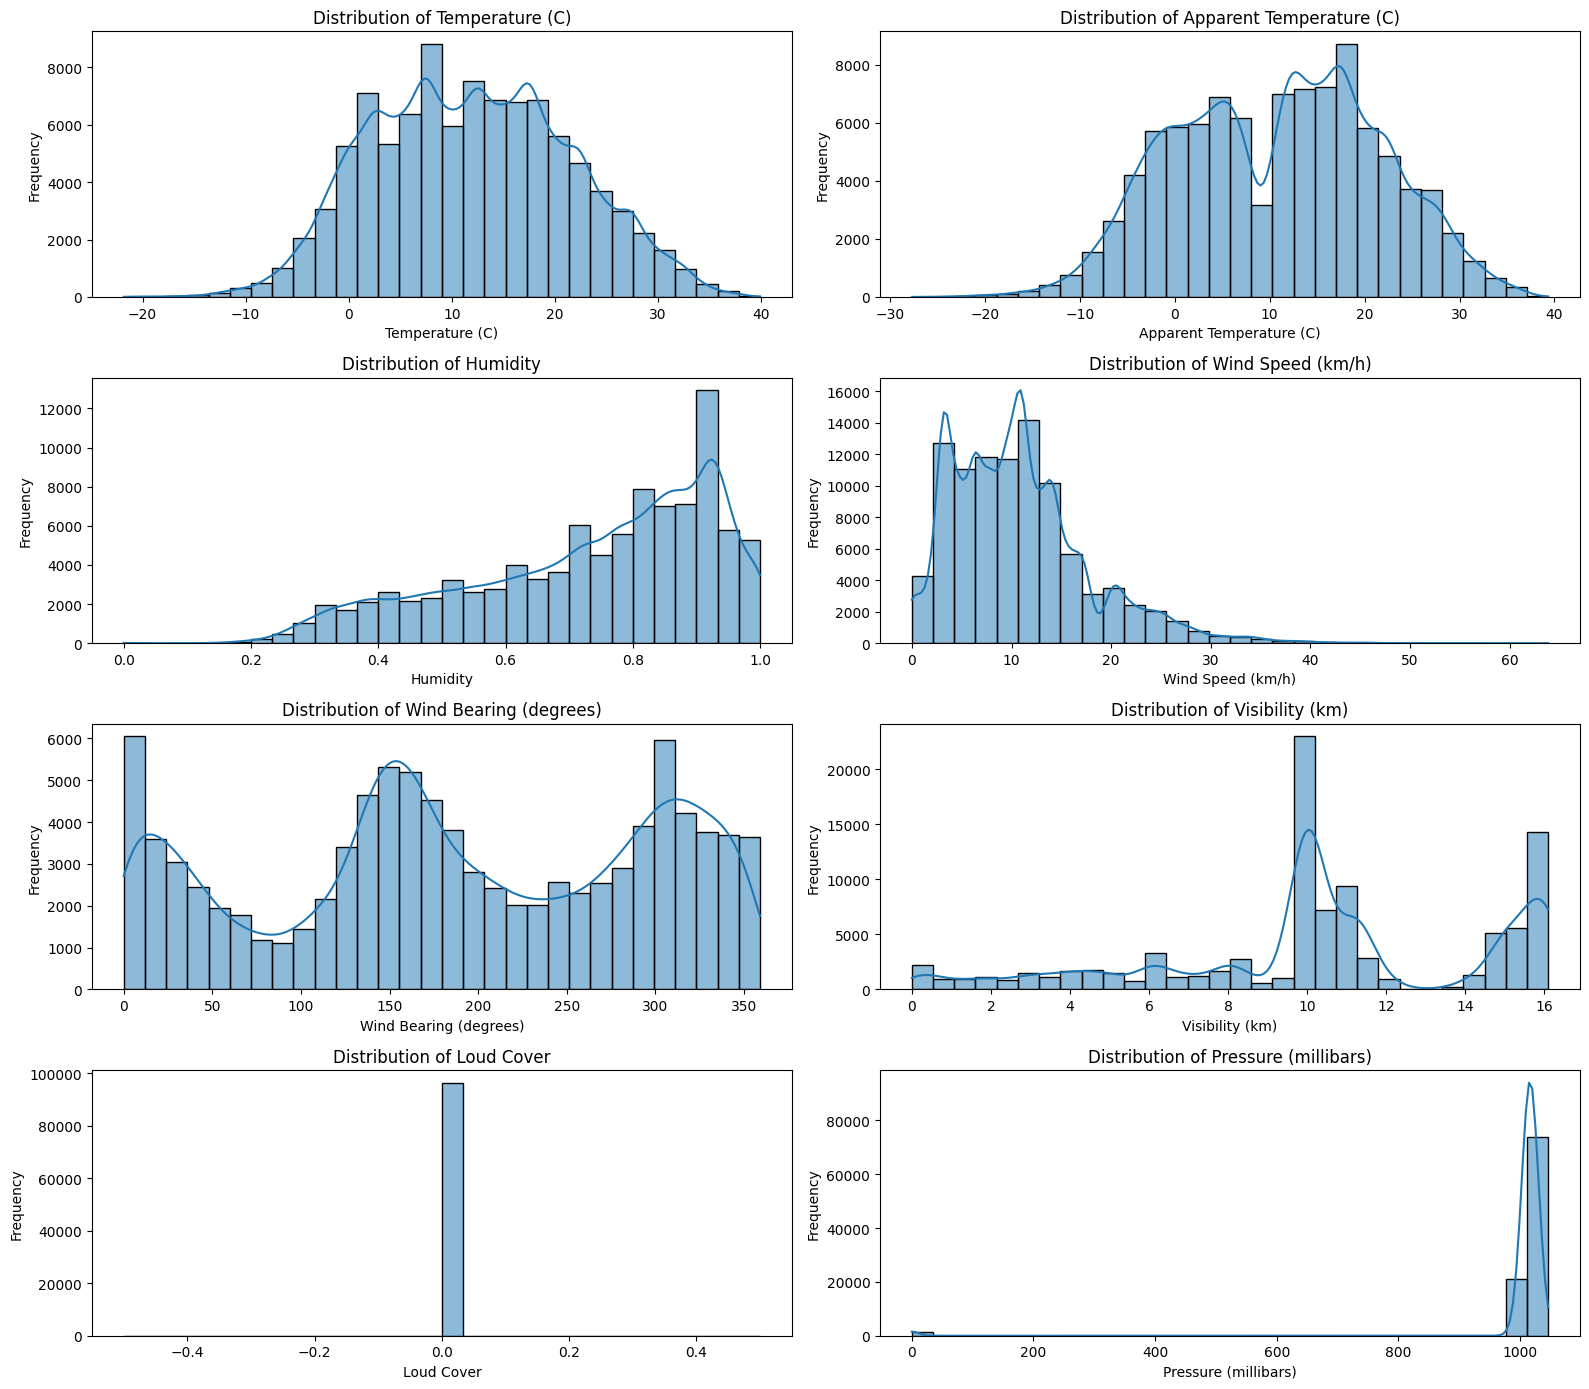

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot grid
plt.figure(figsize=(16, 14))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 🎯 Target Variable: `Visibility (km)`

The target variable `Visibility (km)` shows an interesting **multimodal distribution** with distinct peaks around **0 km**, **10 km**, and **16 km**.

#### Key Observations:
- The **most frequent visibility** level appears to be around **10 km**, indicating normal clear-weather conditions.
- A noticeable **spike at 0 km** may represent periods of **dense fog or extreme weather**, drastically reducing visibility.
- The highest peak is at **16 km**, likely reflecting **maximum visibility** on very clear days.
- The distribution is **highly skewed**, suggesting that visibility varies significantly depending on atmospheric conditions and time of year.

#### Implications for Modeling:
- The multimodal nature and skewness of this variable could affect regression modeling.
- Consider **transformations** or **binning** for certain models.
- Weather patterns affecting visibility may need to be segmented or modeled using non-linear techniques for better prediction accuracy.


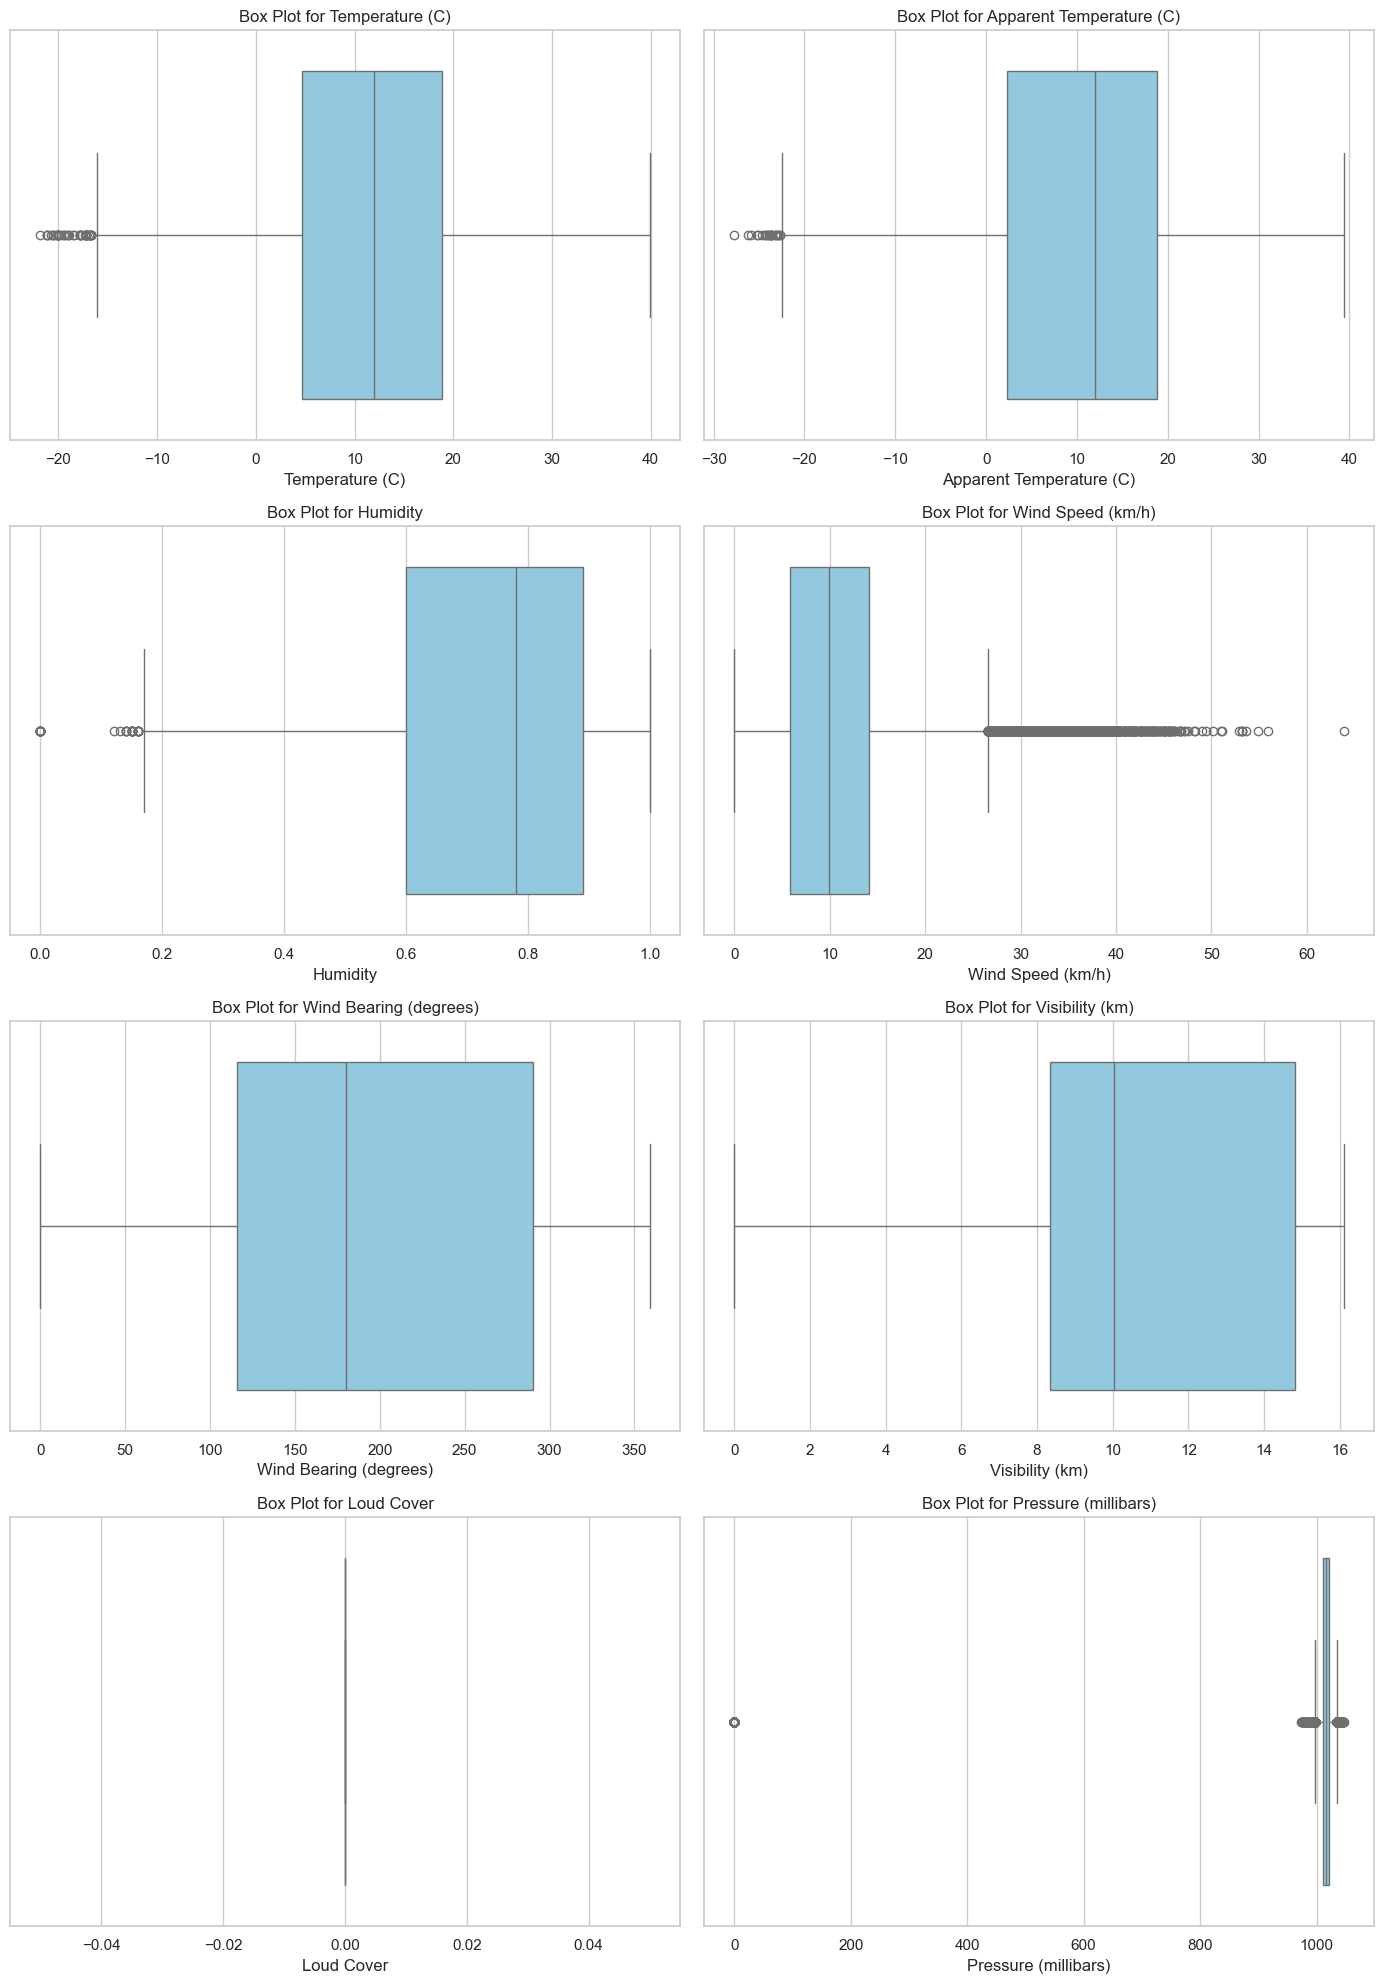

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Total number of numerical columns
num_cols = len(numerical_cols)

# Define grid size for subplots
cols = 2  # number of plots per row
rows = math.ceil(num_cols / cols)

# Set plot size
plt.figure(figsize=(14, 5 * rows))
sns.set(style="whitegrid")

# Create each subplot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### 📊 Box Plot Analysis of Numerical Features

Box plots provide a visual representation of the distribution and spread of the numerical variables, including the detection of potential **outliers**. Here's what we observe:

#### ✅ Temperature (C) and Apparent Temperature (C)
- Both features show a **normal distribution**, with some **outliers on the lower end** (below -10°C).
- The median temperature appears around **10–15°C**, suggesting moderate weather conditions in Szeged.

#### ✅ Humidity
- Humidity values are primarily concentrated above **0.6**, with a **single outlier below 0.1**.
- This indicates that most of the observations occurred under relatively humid conditions.

#### ⚠️ Wind Speed (km/h)
- Wind speed contains a significant number of **high-end outliers** (beyond 30 km/h).
- Most values cluster between **0 and 20 km/h**, showing relatively calm wind conditions in Szeged.

#### ✅ Wind Bearing (degrees)
- As expected, wind bearing spans **0° to 360°**, showing a **uniform distribution**.
- No noticeable outliers, as all directions are valid.

#### 🎯 Visibility (km) [**Target Variable**]
- Visibility mostly falls between **10 km and 16 km**, indicating clear weather.
- A few **lower-end outliers** are present (e.g., below 5 km), representing days with fog or heavy precipitation.

#### ⚠️ Pressure (millibars)
- Pressure values lie mostly between **990 and 1030 millibars**, with **a few extreme low outliers**.
- These rare low-pressure events might correspond to storms or unique weather patterns.

#### ⚠️ Loud Cover
- This variable shows **no variation** (single constant value), rendering it statistically insignificant for modeling or analysis.

---

### 🔎 Insights:
- Features like **Wind Speed**, **Pressure**, and **Visibility** require **outlier treatment** to avoid biasing the model.
- **Loud Cover** can likely be dropped due to zero variance.
- Most meteorological variables show reasonable spread, useful for training weather prediction models.


In [14]:
# Create a copy to avoid modifying original DataFrame
df_clean = df.copy()

# Loop through each numerical column
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Display shape after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")


Original dataset shape: (96429, 18)
Cleaned dataset shape: (89150, 18)


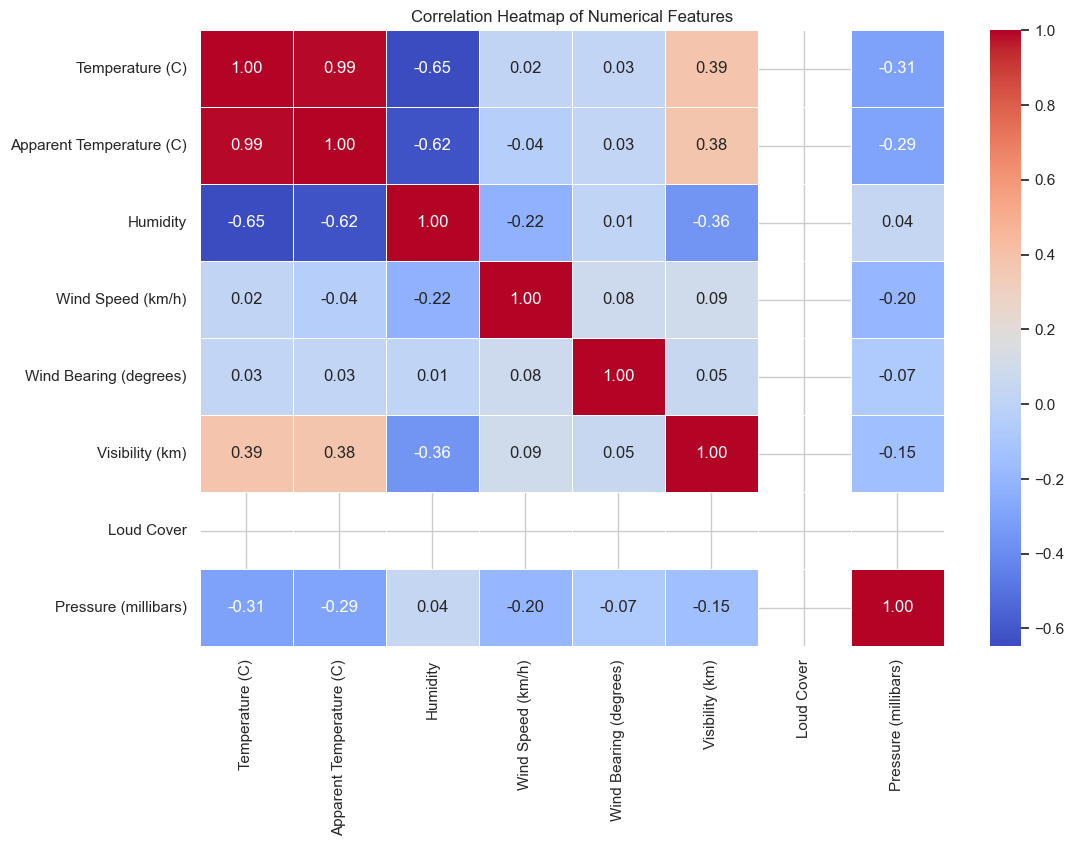

In [15]:
# Compute correlation matrix
corr_matrix = df_clean[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


### 🔗 Correlation Analysis

To understand the relationships between different numerical features in the dataset, we generated a correlation heatmap. This helps identify how strongly variables are related to each other, especially our target variable: **Visibility (km)**.

#### Key Observations:

- **Temperature (C) and Apparent Temperature (C)**:
  - Extremely high correlation (**0.99**), indicating redundancy. We can consider dropping one to avoid multicollinearity.

- **Visibility (km)** [Target Variable]:
  - Positively correlated with:
    - **Temperature (0.39)**
    - **Apparent Temperature (0.38)**
  - Negatively correlated with:
    - **Humidity (-0.36)** – indicating lower visibility on more humid days.
    - **Pressure (-0.15)** – suggesting slight decrease in visibility during low-pressure systems.
    - **Wind Speed (-0.20)** – may imply wind-driven dust or particles reducing visibility.

- **Humidity**:
  - Strong negative correlation with temperature (**-0.65**) – common in warm, dry climates.

- **Wind Bearing**:
  - Near-zero correlations with all variables – likely not useful for prediction.

- **Loud Cover**:
  - Missing correlation values suggest it may be a constant feature or invalid. This confirms earlier findings that it lacks variance and should be dropped.

---

### 📌 Insights for Modeling:
- Strong correlations with the target (`Visibility`) include **Temperature**, **Humidity**, and **Apparent Temperature**, which will be important predictors.
- Redundant or low-value variables such as **Loud Cover** and **Wind Bearing** could be excluded from modeling.
- Correlation values are not very high overall, which suggests potential value in combining features or exploring non-linear models.


Summary statistics for visibility:
count    89150.000000
mean        10.459117
std          4.171354
min          0.000000
25%          8.794625
50%         10.046400
75%         14.908600
max         16.100000
Name: Visibility (km), dtype: float64


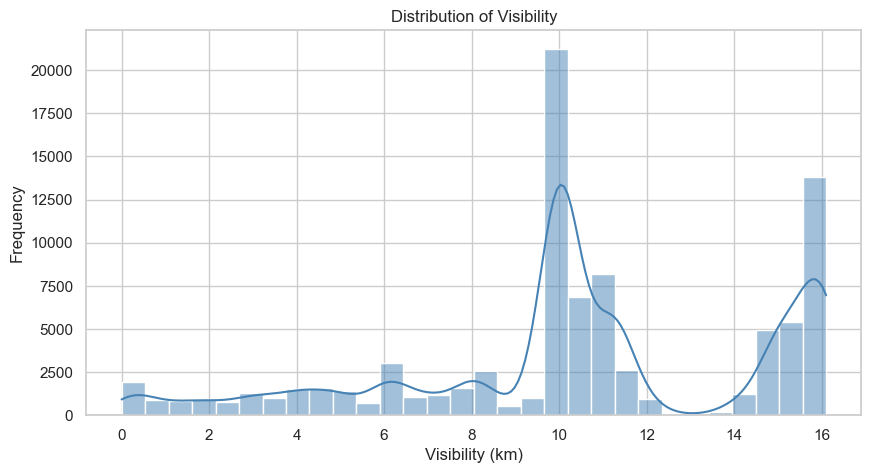

In [16]:
# Summary statistics
print("Summary statistics for visibility:")
print(df_clean['Visibility (km)'].describe())

# Distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Visibility (km)'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Visibility')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


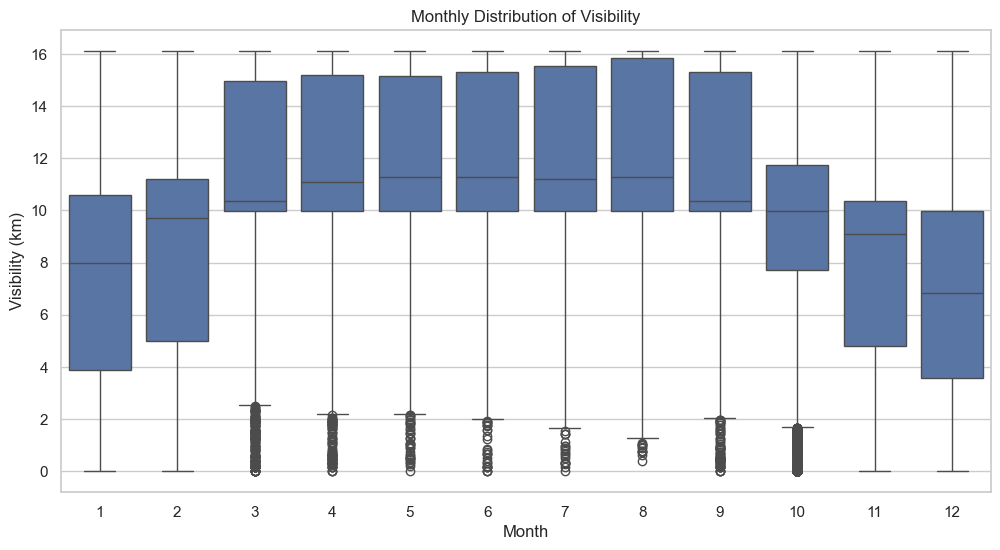

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Visibility (km)', data=df_clean)
plt.title('Monthly Distribution of Visibility')
plt.xlabel('Month')
plt.ylabel('Visibility (km)')
plt.show()


### 📅 Monthly Analysis of Visibility

To understand seasonal patterns in visibility, we visualized the monthly distribution of visibility using boxplots.

#### Key Observations:

- **Lower Visibility in Winter Months (December–February):**
  - Months **1 (January), 2 (February), and 12 (December)** show lower median visibility.
  - These months also exhibit a higher concentration of low-visibility outliers, likely due to fog, snow, or higher humidity.

- **Higher Visibility in Summer Months (June–August):**
  - Visibility is generally **highest from May to September (Months 5–9)**, with medians above 10 km.
  - These months also show narrower interquartile ranges, indicating more consistent visibility during the summer season.

- **Transitional Months (March–April & October–November):**
  - Visibility tends to vary more, especially in **October (Month 10)** and **March (Month 3)**, possibly due to changing weather patterns and humidity levels.

---

### 🌤 Insight:
Visibility shows a **clear seasonal trend**, peaking during the **summer** and dropping in **winter**, which aligns with expectations based on weather phenomena like fog, rain, and snow. This seasonal component can be valuable in time-series modeling or forecasting visibility trends.

Let me know when you're ready to build models or explore feature engineering for seasonality!


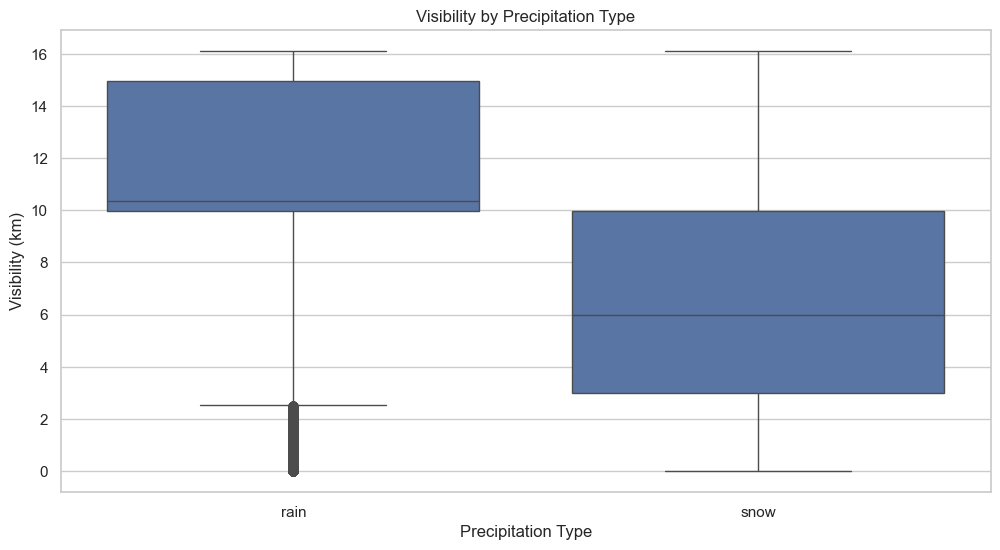

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Precip Type', y='Visibility (km)', data=df_clean)
plt.title('Visibility by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Visibility (km)')
plt.show()

### 🌧️ Visibility by Precipitation Type

To understand how different types of precipitation affect visibility, we plotted a boxplot comparing visibility during **rain** and **snow** events.

#### Key Observations:

- **Visibility During Rain:**
  - Median visibility during rainfall is **higher**, approximately around **10–11 km**.
  - While there are some low-visibility outliers (likely due to heavy rain or fog), the interquartile range (IQR) remains mostly in the higher visibility range.
  - This indicates that rain, in general, doesn't drastically reduce visibility for most observations.

- **Visibility During Snow:**
  - Median visibility drops significantly to around **6 km**, with a much wider spread in the lower range.
  - The lower whisker and a large number of outliers indicate that **snowfall events are often associated with very poor visibility**, potentially due to blowing snow or accumulation.

---

### 💡 Insight:
The **type of precipitation** has a **notable effect on visibility**. **Snow** is more likely to impair visibility compared to **rain**, suggesting that precipitation type could be an important predictor in forecasting visibility-related disruptions.

Let me know if you'd like to analyze other categorical influences or move toward model development!


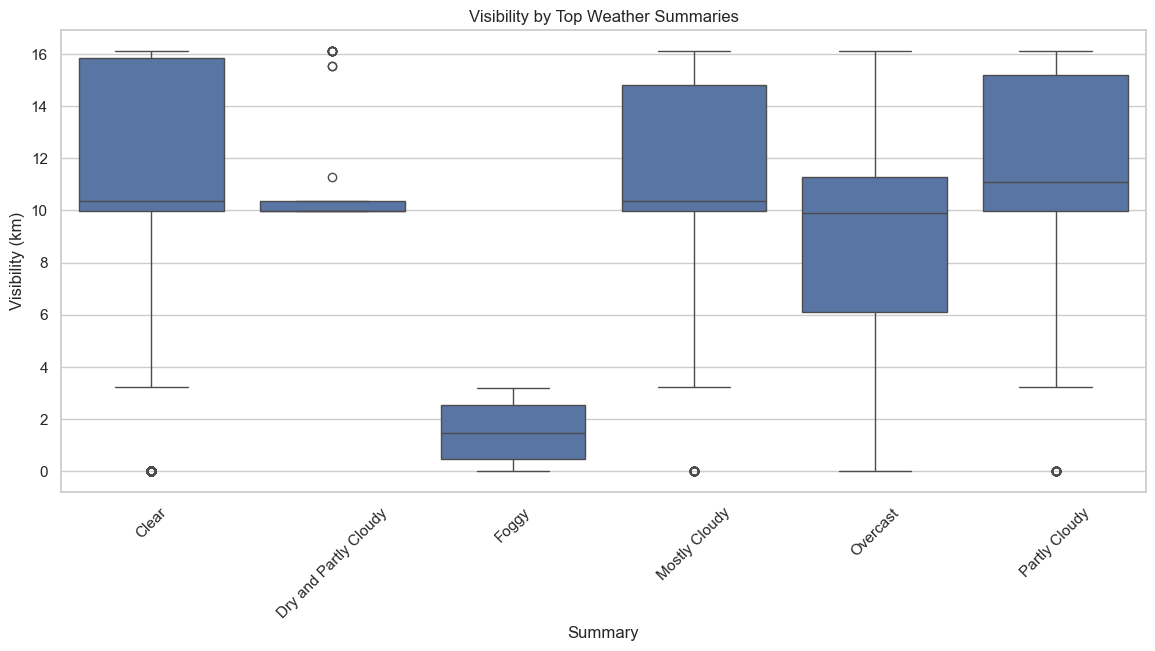

In [19]:
plt.figure(figsize=(14, 6))
top_summaries = df_clean['Summary'].value_counts().nlargest(6).index
filtered_df = df_clean[df_clean['Summary'].isin(top_summaries)]

sns.boxplot(x='Summary', y='Visibility (km)', data=filtered_df)
plt.title('Visibility by Top Weather Summaries')
plt.xticks(rotation=45)
plt.show()

### ☁️ Visibility by Weather Summary

To further investigate how overall weather conditions affect visibility, we created a boxplot comparing visibility across the top weather summaries.

#### Key Observations:

- **Clear** and **Partly Cloudy** conditions are associated with the **highest visibility**, with median values close to **16 km** and minimal variation.
- **Foggy** weather shows a **drastic drop in visibility**, with a median around **1–2 km** and minimal spread, confirming that fog is the most visibility-limiting condition.
- **Overcast** and **Mostly Cloudy** conditions display moderate variability in visibility:
  - **Overcast** has a wider spread and a slightly lower median compared to mostly cloudy conditions.
  - **Mostly Cloudy** has a relatively higher median visibility, showing overlap with clearer conditions.
- **Dry and Partly Cloudy** also indicate stable visibility, similar to "Clear", suggesting that precipitation and fog are more critical factors than cloud coverage alone.

---

### 💡 Insight:
The type of **weather summary strongly influences visibility**, with **foggy** conditions being the most impairing. This visualization emphasizes the need to factor in qualitative weather descriptions when building predictive models or issuing visibility warnings.


### Model Building

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

In [44]:
# Target and feature separation
target = 'Visibility (km)'
X = df_clean.drop(columns=[target, 'Formatted Date'])  # Drop datetime + target
y = df_clean[target]

In [45]:
# Column identification
categorical_cols = ['Summary', 'Precip Type', 'Daily Summary', 'weekday', 'is_weekend']
numerical_cols = [col for col in X.select_dtypes(include=['int64', 'int32', 'float64']).columns if col not in categorical_cols]

In [46]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Transform
X_processed = preprocessor.fit_transform(X)

In [ ]:
# Feature names
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
final_feature_names = list(ohe_feature_names) + numerical_cols

# Final check
assert X_processed.shape[1] == len(final_feature_names), "Mismatch between transformed data and column names!"

In [51]:
# Convert to DataFrame
X_df = pd.DataFrame(X_processed, columns=final_feature_names)

# ➤ Split data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ➤ Reset indices to align for OLS
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# ➤ Fit OLS on training set
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

# ➤ Show OLS summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Visibility (km)   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     314.1
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:26:10   Log-Likelihood:            -1.7729e+05
No. Observations:               71320   AIC:                         3.551e+05
Df Residuals:                   71079   BIC:                         3.573e+05
Df Model:                         240                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
--

In [53]:
# Add constant to X_test
X_test_const = sm.add_constant(X_test)

# Predict on test set using OLS model
y_pred = ols_model.predict(X_test_const)

# Reset the index for alignment
y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)

# Calculate residuals
residuals = y_test - y_pred

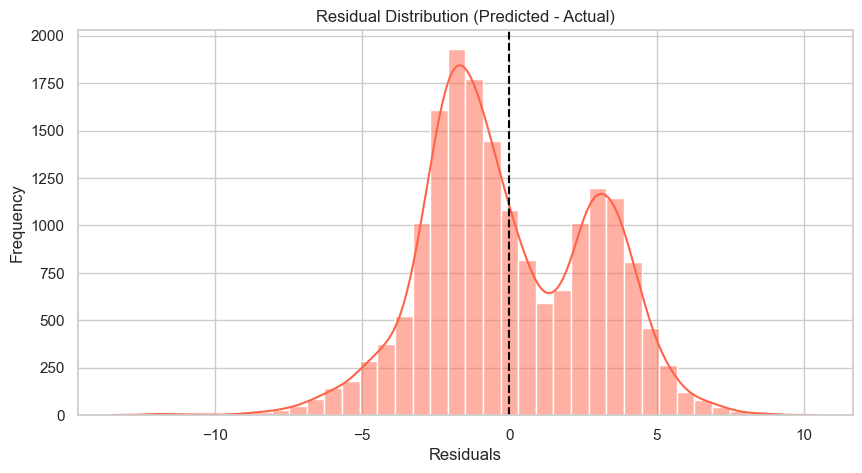

In [54]:
# Plot residual distribution
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=40, kde=True, color='tomato')
plt.title("Residual Distribution (Predicted - Actual)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()


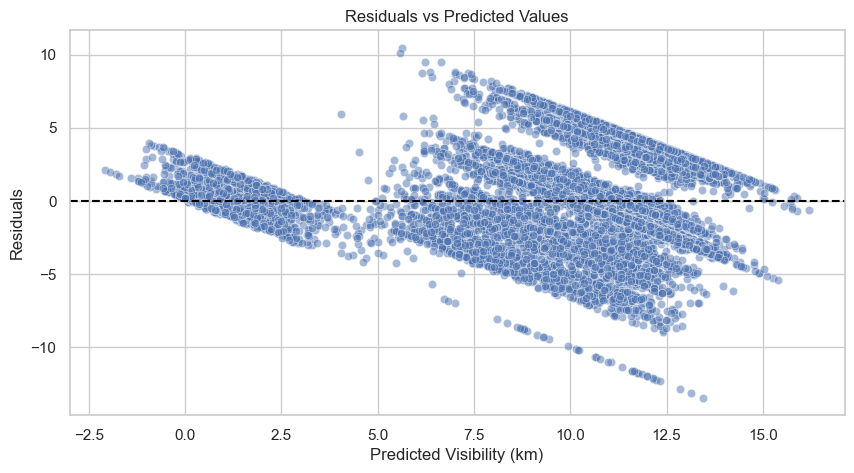

In [55]:
# Optional: Residuals vs Predicted Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Visibility (km)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [56]:
# Select numerical columns
numerical_cols_only = df_clean.select_dtypes(include=['int64', 'float64']).drop(columns=['Visibility (km)']).columns.tolist()

# Define features and target
X_num = df_clean[numerical_cols_only]
y_num = df_clean['Visibility (km)']

In [57]:
# Train-test split
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

# Add constant for OLS
X_num_train_const = sm.add_constant(X_num_train)

# Fit the OLS model
ols_num_model = sm.OLS(y_num_train, X_num_train_const).fit()

# Summary
print(ols_num_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Visibility (km)   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     2628.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:39:36   Log-Likelihood:            -1.9595e+05
No. Observations:               71320   AIC:                         3.919e+05
Df Residuals:                   71313   BIC:                         3.920e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [58]:
# ➤ Predict on test set
X_num_test_const = sm.add_constant(X_num_test)
y_num_pred = ols_num_model.predict(X_num_test_const)

# ➤ Calculate residuals
residuals_num = y_num_test - y_num_pred

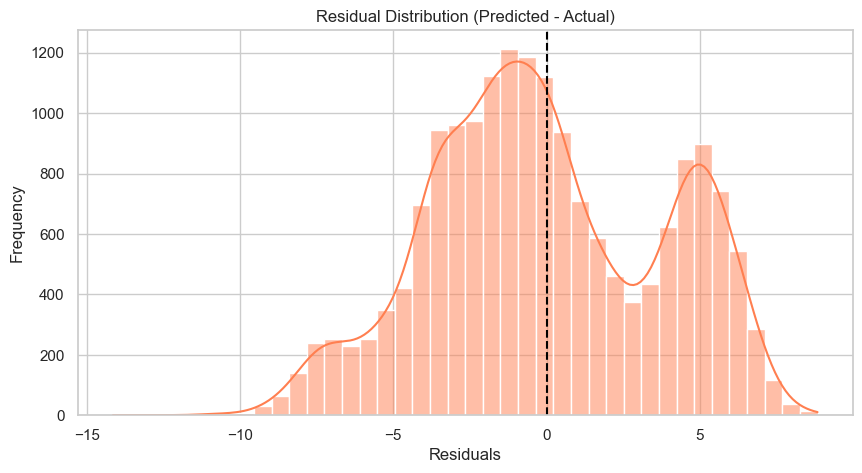

In [59]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals_num, bins=40, kde=True, color='coral')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Residual Distribution (Predicted - Actual)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

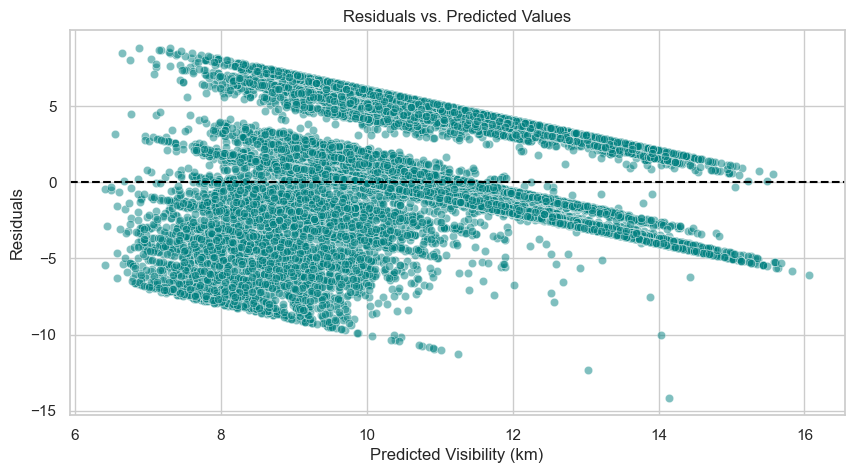

In [60]:
# --- Residuals vs. Predicted Values Plot ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_num_pred, y=residuals_num, alpha=0.5, color='teal')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Visibility (km)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [61]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# ➤ Split the full processed data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ➤ Define regularization strength values (alphas)
alphas = [0.01, 0.1, 1, 10, 100]

In [63]:
# ➤ Ridge Regression Pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=alphas, cv=5))
])
ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)

# ➤ Lasso Regression Pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=5, max_iter=10000))
])
lasso_pipeline.fit(X_train, y_train)
lasso_pred = lasso_pipeline.predict(X_test)

In [64]:
# ➤ Evaluation
print("🔹 Ridge Regression:")
print(f"Best alpha: {ridge_pipeline.named_steps['ridge'].alpha_}")
print(f"R² Score: {r2_score(y_test, ridge_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, ridge_pred):.4f}\n")

print("🔹 Lasso Regression:")
print(f"Best alpha: {lasso_pipeline.named_steps['lasso'].alpha_}")
print(f"R² Score: {r2_score(y_test, lasso_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, lasso_pred):.4f}")


🔹 Ridge Regression:
Best alpha: 10.0
R² Score: 0.5134
MSE: 8.4580

🔹 Lasso Regression:
Best alpha: 0.01
R² Score: 0.5125
MSE: 8.4742


In [65]:
# ➤ Calculate residuals
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred

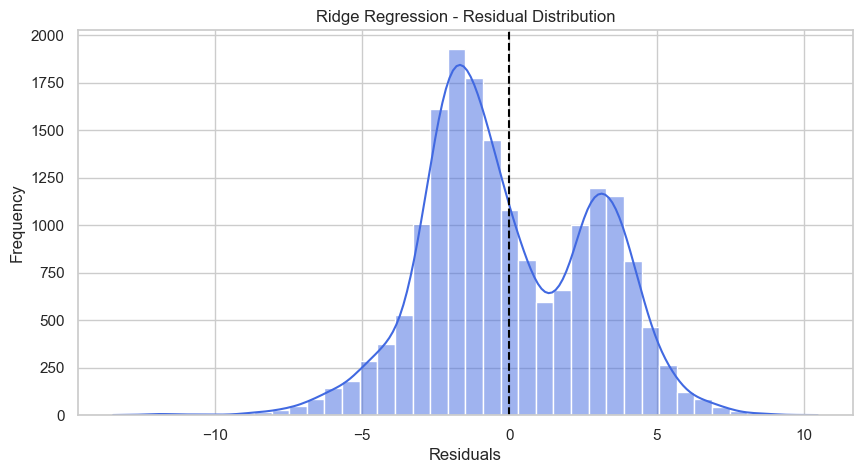

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(ridge_residuals, bins=40, kde=True, color='royalblue')
plt.axvline(0, color='black', linestyle='--')
plt.title('Ridge Regression - Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

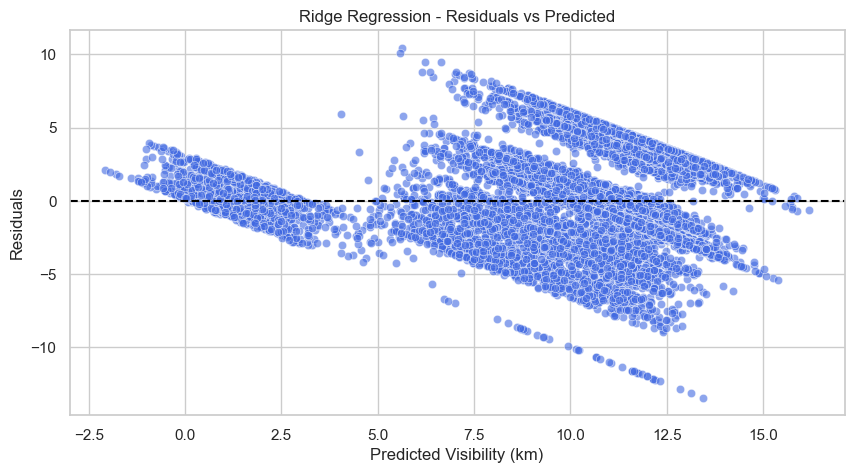

In [67]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ridge_pred, y=ridge_residuals, alpha=0.6, color='royalblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Ridge Regression - Residuals vs Predicted')
plt.xlabel('Predicted Visibility (km)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

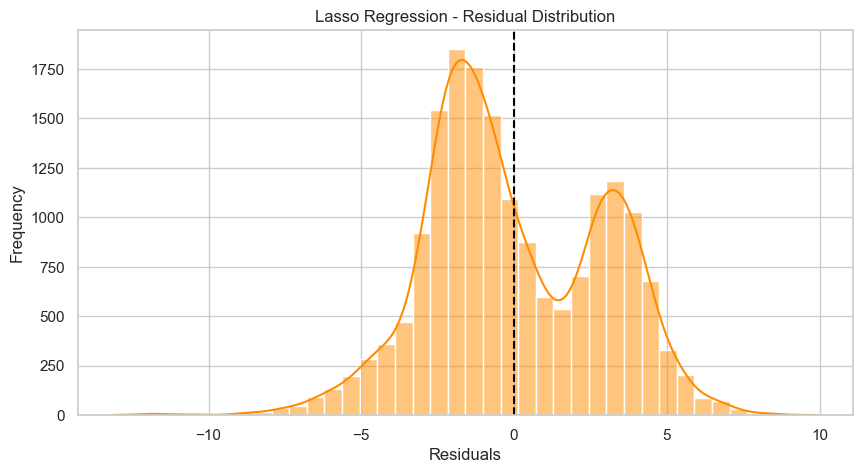

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(lasso_residuals, bins=40, kde=True, color='darkorange')
plt.axvline(0, color='black', linestyle='--')
plt.title('Lasso Regression - Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

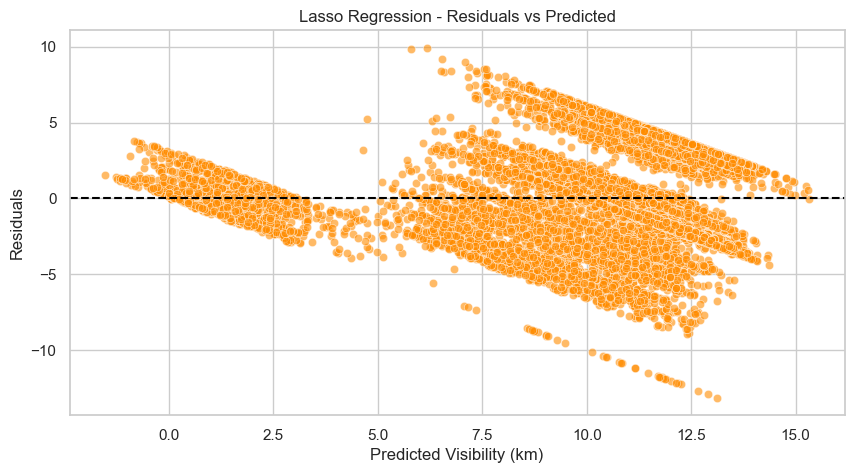

In [69]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=lasso_pred, y=lasso_residuals, alpha=0.6, color='darkorange')
plt.axhline(0, color='black', linestyle='--')
plt.title('Lasso Regression - Residuals vs Predicted')
plt.xlabel('Predicted Visibility (km)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [73]:
# Compute residuals
residuals_ols = y_test.reset_index(drop=True) - y_pred.reset_index(drop=True)
residuals_ridge = y_test.reset_index(drop=True) - ridge_pred
residuals_lasso = y_test.reset_index(drop=True) - lasso_pred

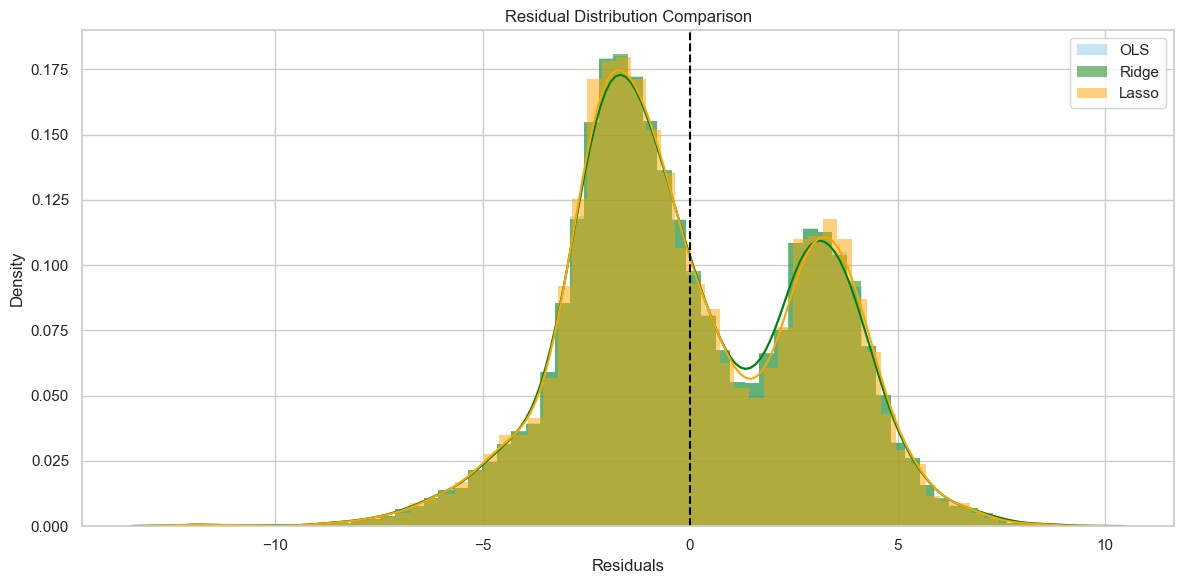

In [76]:
# Plot
plt.figure(figsize=(12, 6))
sns.histplot(residuals_ols, kde=True, color='skyblue', label='OLS', stat='density', linewidth=0)
sns.histplot(residuals_ridge, kde=True, color='green', label='Ridge', stat='density', linewidth=0)
sns.histplot(residuals_lasso, kde=True, color='orange', label='Lasso', stat='density', linewidth=0)

plt.axvline(0, color='black', linestyle='--')
plt.title('Residual Distribution Comparison')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()